# Extracting The Country From The I.P Adress

Before we can do any data analysis and model creation, let us add a new column called 'country' in the fraud data table that indicates from which country did the user purchase the item. We can do this by using the ip_address table, i.e if an I.P address falls within a certain range, then we can find the country of origin.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from datetime import datetime, time
import time

In [2]:
fraud_data = pd.read_csv("Fraud_Data.csv")
ip_address_to_country = pd.read_csv("IpAddress_to_Country.csv")

display(fraud_data.head(5))
display(ip_address_to_country.head(5))

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [3]:
def ip_to_country(ip_address):
    lower_bound = ip_address_to_country['lower_bound_ip_address'] <= ip_address
    upper_bound = ip_address_to_country['upper_bound_ip_address'] >= ip_address
    
    if len(ip_address_to_country[lower_bound & upper_bound]['country'].values) > 0:
        return ip_address_to_country[lower_bound & upper_bound]['country'].values[0]
    else:
        return 'None'

In [4]:
start_time = time.time()
fraud_data['country'] = np.vectorize(ip_to_country)(fraud_data['ip_address'])
print("Time taken to complete process (seconds): %s" % (time.time() - start_time))

Time taken to complete process (seconds): 444.6918411254883


In [5]:
fraud_data.head(15)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,None
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,United States
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,China
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,United States


In [6]:
#Save the fraud data with country column
fraud_data.to_csv("fraud_data_with_country.csv")

To save a bit of time, there is a file called fraud_data_with_country that is the result of running the above cells. If it takes too long to find the country from the ip address for 151,000 rows, simply run the cell below.

In [3]:
#If fraud_data_with_country.csv file exists simply load it into a dataframe
fraud_data = pd.read_csv("fraud_data_with_country.csv", index_col = 0)

# Exploratory Data Analysis

In [4]:
print("Number of Rows: \t\t" + str(len(fraud_data)))
print("Number of Unique User IDs: \t" + str(len(fraud_data.index.unique())))
print("Number of Unique Device IDs: \t" + str(len(fraud_data['device_id'].unique())))

Number of Rows: 		151112
Number of Unique User IDs: 	151112
Number of Unique Device IDs: 	137956


Based on the above table, we can conclude that there exists at least one device that is used by multiple users. If there are multiple users that try to make a transaction from the same device, then the transaction might be fraudulent. Let's take a sample of  the devices where there were used by more than 2 users.

In [5]:
device_ids = (fraud_data.groupby('device_id')['user_id'].count() > 1)
duplicated_device_ids = np.array(device_ids[device_ids == True].index)
np.random.shuffle(duplicated_device_ids)

for device_id in duplicated_device_ids[0:10]:
    if len(fraud_data[fraud_data['device_id'] == device_id]) > 2:
        display(fraud_data[fraud_data['device_id'] == device_id])

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
16080,89282,2015-01-12 05:38:30,2015-01-12 05:38:31,10,VGCGSGCJILYYI,Direct,Chrome,M,39,3.744589e+09,1,Korea Republic of
28029,56660,2015-01-12 05:38:28,2015-01-12 05:38:29,10,VGCGSGCJILYYI,Direct,Chrome,M,39,3.744589e+09,1,Korea Republic of
29457,196694,2015-01-12 05:38:31,2015-01-12 05:38:32,10,VGCGSGCJILYYI,Direct,Chrome,M,39,3.744589e+09,1,Korea Republic of
37861,390533,2015-01-12 05:38:26,2015-03-24 05:42:39,10,VGCGSGCJILYYI,Direct,Chrome,M,39,3.744589e+09,0,Korea Republic of
81068,228713,2015-01-12 05:38:32,2015-01-12 05:38:33,10,VGCGSGCJILYYI,Direct,Chrome,M,39,3.744589e+09,1,Korea Republic of
94498,39903,2015-01-12 05:38:27,2015-01-12 05:38:28,10,VGCGSGCJILYYI,Direct,Chrome,M,39,3.744589e+09,1,Korea Republic of
97853,13822,2015-01-12 05:38:35,2015-01-12 05:38:36,10,VGCGSGCJILYYI,Direct,Chrome,M,39,3.744589e+09,1,Korea Republic of
100964,222104,2015-01-12 05:38:29,2015-01-12 05:38:30,10,VGCGSGCJILYYI,Direct,Chrome,M,39,3.744589e+09,1,Korea Republic of
109669,173800,2015-01-12 05:38:34,2015-01-12 05:38:35,10,VGCGSGCJILYYI,Direct,Chrome,M,39,3.744589e+09,1,Korea Republic of
140752,164891,2015-01-12 05:38:33,2015-01-12 05:38:34,10,VGCGSGCJILYYI,Direct,Chrome,M,39,3.744589e+09,1,Korea Republic of


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
14202,94701,2015-01-05 08:08:37,2015-01-05 08:08:38,12,ROGEGTJRATEKV,SEO,Opera,M,37,2.751388e+09,1,United States
49546,143809,2015-01-05 08:08:35,2015-01-05 08:08:36,12,ROGEGTJRATEKV,SEO,Opera,M,37,2.751388e+09,1,United States
57356,163168,2015-01-05 08:08:32,2015-01-19 10:13:44,12,ROGEGTJRATEKV,SEO,Opera,M,37,2.751388e+09,0,United States
59514,190985,2015-01-05 08:08:43,2015-01-05 08:08:44,12,ROGEGTJRATEKV,SEO,Opera,M,37,2.751388e+09,1,United States
69932,50055,2015-01-05 08:08:38,2015-01-05 08:08:39,12,ROGEGTJRATEKV,SEO,Opera,M,37,2.751388e+09,1,United States
88237,72269,2015-01-05 08:08:40,2015-01-05 08:08:41,12,ROGEGTJRATEKV,SEO,Opera,M,37,2.751388e+09,1,United States
89781,315717,2015-01-05 08:08:36,2015-01-05 08:08:37,12,ROGEGTJRATEKV,SEO,Opera,M,37,2.751388e+09,1,United States
110523,264878,2015-01-05 08:08:34,2015-01-05 08:08:35,12,ROGEGTJRATEKV,SEO,Opera,M,37,2.751388e+09,1,United States
124254,9168,2015-01-05 08:08:41,2015-01-05 08:08:42,12,ROGEGTJRATEKV,SEO,Opera,M,37,2.751388e+09,1,United States
126713,328379,2015-01-05 08:08:33,2015-01-05 08:08:34,12,ROGEGTJRATEKV,SEO,Opera,M,37,2.751388e+09,1,United States


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
6463,232759,2015-01-06 00:05:53,2015-01-06 00:05:54,15,KLCMFZVFBRYOP,Ads,Chrome,M,36,1.819146e+07,1,Japan
26526,326442,2015-01-06 00:05:49,2015-01-06 00:05:50,15,KLCMFZVFBRYOP,Ads,Chrome,M,36,1.819146e+07,1,Japan
70352,201313,2015-01-06 00:05:52,2015-01-06 00:05:53,15,KLCMFZVFBRYOP,Ads,Chrome,M,36,1.819146e+07,1,Japan
100683,330259,2015-01-06 00:05:51,2015-01-06 00:05:52,15,KLCMFZVFBRYOP,Ads,Chrome,M,36,1.819146e+07,1,Japan
104182,293688,2015-01-06 00:05:48,2015-05-03 01:13:05,15,KLCMFZVFBRYOP,Ads,Chrome,M,36,1.819146e+07,0,Japan
135857,59988,2015-01-06 00:05:50,2015-01-06 00:05:51,15,KLCMFZVFBRYOP,Ads,Chrome,M,36,1.819146e+07,1,Japan


As I suspect, a device that is used by more than 2 users (or 10 users) is strongly correlated to a fraudulent transaction. Interestingly, after running the above cell multiple times, I notice that the time difference between signup and purchase time for fraudulent transactions is usually one second. This might be an important factor in determining whether a transaction is fraudulent. Let's add it to our fraud data before we analyse the devices that have more than 2 users.

In [6]:
def date_diff_in_seconds(index):
    date1 = datetime.strptime(fraud_data.iloc[index]['signup_time'], '%Y-%m-%d %H:%M:%S')
    date2 = datetime.strptime(fraud_data.iloc[index]['purchase_time'], '%Y-%m-%d %H:%M:%S')
    time_delta = date2 - date1
    
    return time_delta.days * 24 * 3600 + time_delta.seconds

fraud_data['time_duration (secs)'] = np.vectorize(date_diff_in_seconds)(fraud_data.index)
fraud_data.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_duration (secs)
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,492085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461


Now lets analyse the devices that have more than 2 users.

Minimum number of users per device id: 1
Maximum number of users per device id: 20


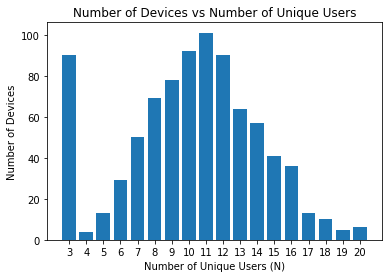

In [8]:
num_unique_users_to_device_id \
= fraud_data[['user_id', 'device_id']].groupby('device_id').count()

num_unique_users_to_device_id.rename(columns = {'user_id': 'num_unique_user_ids'}, 
                                     inplace = True)

minimum_num_users = num_unique_users_to_device_id['num_unique_user_ids'].min()
maximum_num_users = num_unique_users_to_device_id['num_unique_user_ids'].max()

print("Minimum number of users per device id: %d" % minimum_num_users)
print("Maximum number of users per device id: %d" % maximum_num_users)

count_devices_to_num_users = []
for num_users in range(3, 21):
    num_user_condition = (num_unique_users_to_device_id['num_unique_user_ids'] 
                          == num_users)
    num = num_unique_users_to_device_id[num_user_condition].shape[0]
    count_devices_to_num_users.append(num)

plt.bar([x for x in range(3, 21)], count_devices_to_num_users)
plt.xticks([x for x in range(3, 21)])
plt.title("Number of Devices vs Number of Unique Users")
plt.xlabel("Number of Unique Users (N)")
plt.ylabel("Number of Devices")
plt.show()

The above cell simply generates a bar graph where the y-axis is the number of devices and the x-axis is the number of unique users using a device. What is interesting about this graph is that looks normally distributed where the mean number of users for a single device is about 11. For each number of unique users, we would like to know what proportion of the devices are associated to fraud. The next two cells will answer our question.

In [9]:
device_id_is_fraudulant \
= fraud_data[['device_id', 'class']].groupby(['device_id']).agg(lambda x:x.value_counts().index[0])

fraud_user_condition = device_id_is_fraudulant['class'] == 1

count_devices_associated_with_fraud      = []
count_devices_to_num_users               = []
count_devices_not_associated_with_fraud  = []

for num_users in range(3, 21):
    num_user_condition = (num_unique_users_to_device_id['num_unique_user_ids'] == num_users)
  
    num = num_unique_users_to_device_id[num_user_condition].shape[0]
    count_devices_to_num_users.append(num)
  
    num_fraud = num_unique_users_to_device_id[num_user_condition & fraud_user_condition].shape[0]  
    count_devices_associated_with_fraud.append(num_fraud)
  
    count_devices_not_associated_with_fraud.append(num - num_fraud)

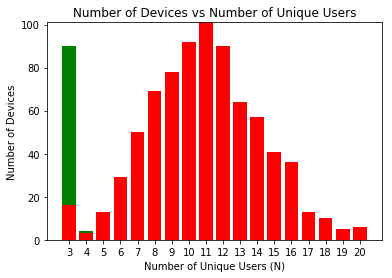

In [10]:
plt.bar([x for x in range(3, 21)], count_devices_associated_with_fraud, color = 'red')
plt.bar([x for x in range(3, 21)], count_devices_not_associated_with_fraud,
        bottom = count_devices_associated_with_fraud, color = 'green')
plt.xticks([x for x in range(3, 21)])
plt.title("Number of Devices vs Number of Unique Users")
plt.xlabel("Number of Unique Users (N)")
plt.ylabel("Number of Devices")
plt.show()

Most devices that have 3 unique users are not associated to fraudulent transactions. A possible reason could be that there is a family (eg father, mother, and single child) sharing a single device. All devices that have 5 or more unique users are associated with fraud. This means that the number of unique users on a device is an important factor in detecting fraudulant transactions. Let us look at purchase value, and see if it is also an important feature in detecting fraud.

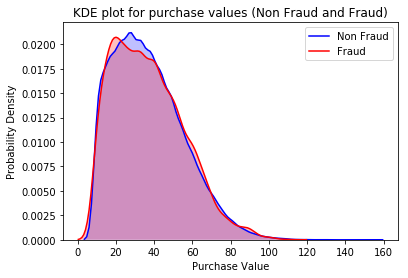

In [11]:
non_fraudulent_transactions = fraud_data[fraud_data['class'] == 0]
fraudulent_transactions     = fraud_data[fraud_data['class'] == 1]

non_fraudulent_transactions['purchase_value']
sns.kdeplot(non_fraudulent_transactions['purchase_value'], shade = True, color = 'blue', label = "Non Fraud")
sns.kdeplot(fraudulent_transactions['purchase_value'], shade = True, color = 'red', label = "Fraud")

plt.title("KDE plot for purchase values (Non Fraud and Fraud)")
plt.ylabel("Probability Density")
plt.xlabel("Purchase Value")

plt.show()

The KDE plot demonstrates that the distribution between fraudulent and non fraudulent transactions, in terms of its purchase value, is very similar with one another. Therefore, purchase value on its own will not be useful in determining fraud based on the data that we have. Lets focus more on fraudelent transactions see what tools do fraudsters use to make a transaction.

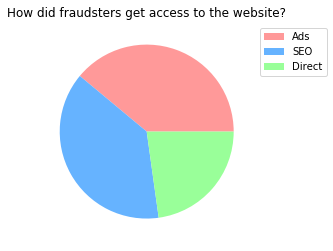

In [56]:
plt.pie(fraud_data[fraud_data['class'] == 1]['source'].value_counts(),
        colors = ['#ff9999','#66b3ff','#99ff99'])
plt.title("How did fraudsters get access to the website?")
plt.legend(['Ads', 'SEO', 'Direct'], bbox_to_anchor = (1.0, 1.0))
plt.show()

Most of them got access to the website through advertisements, and search engine optimizations.

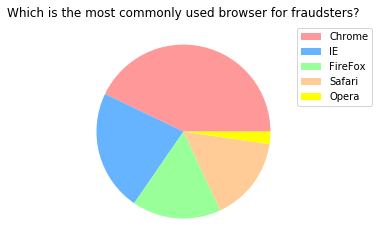

In [57]:
plt.pie(fraud_data[fraud_data['class'] == 1]['browser'].value_counts(),
        colors = ['#ff9999','#66b3ff','#99ff99','#ffcc98', 'yellow'])
plt.title("Which is the most commonly used browser for fraudsters?")
plt.legend(['Chrome', 'IE', 'FireFox', 'Safari', 'Opera'], bbox_to_anchor=(1.0, 1.0))
plt.show()

Most of them use Chrome, Internet Explorer, and FireFox as their browser to access the website.

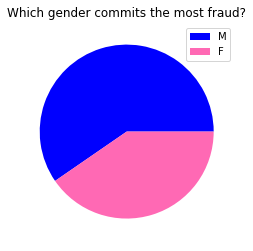

In [14]:
plt.pie(fraud_data[fraud_data['class'] == 1]['sex'].value_counts(), colors = ['blue', 'hotpink'])
plt.title("Which gender commits the most fraud?")
plt.legend(['M', 'F'])
plt.show()

Most fraudsters are male.

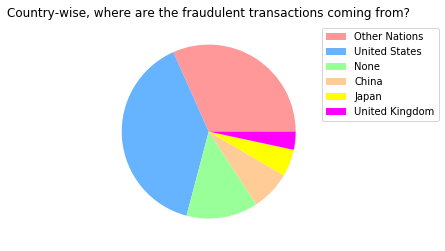

In [15]:
series = fraud_data[fraud_data['class'] == 1]['country'].value_counts()
country_to_fraud_count = pd.DataFrame(series)
dictionary = {'Other Nations': 0}

for country in country_to_fraud_count.index:
    if country_to_fraud_count.loc[country].values[0] > 450:
        dictionary[country] = country_to_fraud_count.loc[country].values[0]
    else:
        dictionary['Other Nations'] += country_to_fraud_count.loc[country].values[0]

country_to_fraud_count = pd.Series(dictionary)
plt.pie(country_to_fraud_count,
        colors = ['#ff9999','#66b3ff','#99ff99','#ffcc98', 'yellow', 'magenta'])
plt.title("Country-wise, where are the fraudulent transactions coming from?")
plt.legend(['Other Nations', 'United States', 'None', 'China', 'Japan', 'United Kingdom'], bbox_to_anchor=(1.0, 1.0))
plt.show()

# Model Creation

## Preprocessing Step

As a preprocessing step, we will add the number of unique users column into our fraud_data dataframe. This number is associated to a device ID (i.e how many unique users are using a device).

In [16]:
fraud_data['num_unique_users_for_device'] \
= fraud_data['device_id'].apply(lambda x: num_unique_users_to_device_id.loc[x])

fraud_data.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_duration (secs),num_unique_users_for_device
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None,492085,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461,1
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada,4240931,1
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0,None,2177825,1
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0,United States,4268729,1
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0,China,3594200,1
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0,United States,4943753,1


Filter out the fraud dataframe so that have the columns that are of most interest in detecting fraud and one hot encode all categorical variables.

In [17]:
columns_of_interest = ['num_unique_users_for_device', 'time_duration (secs)', 
                       'purchase_value', 'source','browser', 'sex', 'age', 
                       'country','class']

modified_fraud_data = fraud_data[columns_of_interest].copy()
modified_fraud_data = pd.get_dummies(modified_fraud_data)
column_list = list(modified_fraud_data)

for i in range(0,3):
    column_list[i], column_list[4] = column_list[4], column_list[i]
    
modified_fraud_data = modified_fraud_data[column_list]
modified_fraud_data.head(10)

,class,num_unique_users_for_device,time_duration (secs),age,purchase_value,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,0,1,4506682,39,34,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,17944,53,16,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,12,1,53,15,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,492085,41,44,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,4361461,45,39,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,1,4240931,18,42,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,2177825,19,11,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,4268729,34,27,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8,0,1,3594200,43,30,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,4943753,31,62,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Logistic Regression

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score, roc_auc_score

x_train, x_val_test, y_train, y_val_test = train_test_split(modified_fraud_data[column_list[1:]], 
                                                            modified_fraud_data['class'],
                                                            test_size = 0.30)
x_val = x_val_test[0:len(x_val_test) // 2]
y_val = y_val_test[0:len(x_val_test) // 2]

x_test = x_val_test[len(x_val_test) // 2:]
y_test = y_val_test[len(x_val_test) // 2:]

scaler = preprocessing.MinMaxScaler()
scaler = scaler.fit(x_train)

x_train_minmax = scaler.transform(x_train)
x_val_minmax   = scaler.transform(x_val) 
x_test_minmax  = scaler.transform(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [60]:
model = LogisticRegression(penalty = 'l1', C = 3)

In [61]:
model.fit(x_train_minmax, y_train)
y_predict = model.predict(x_val_minmax)

print("Validation Results")
print("-------------")
print("Accurcay: \t %f"  %(accuracy_score(y_val, y_predict)))
print("Recall: \t %f"    %(recall_score(y_val, y_predict)))
print("F1 Score: \t %f"  %(f1_score(y_val, y_predict)))
print("Precision: \t %f" %(precision_score(y_val, y_predict)))
print("AUC score: \t %f" %(roc_auc_score(y_val, y_predict)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Validation Results
-------------
Accurcay: 	 0.951383
Recall: 	 0.514656
F1 Score: 	 0.660296
Precision: 	 0.920894
AUC score: 	 0.755094


In [62]:
y_predict = model.predict(x_test_minmax)

print("Test Results")
print("-------------")
print("Accurcay: \t %f"  %(accuracy_score(y_test, y_predict)))
print("Recall: \t %f"    %(recall_score(y_test, y_predict)))
print("F1 Score: \t %f"  %(f1_score(y_test, y_predict)))
print("Precision: \t %f" %(precision_score(y_test, y_predict)))
print("AUC score: \t %f" %(roc_auc_score(y_test, y_predict)))

Test Results
-------------
Accurcay: 	 0.951207
Recall: 	 0.527897
F1 Score: 	 0.666867
Precision: 	 0.905151
AUC score: 	 0.761129


In [63]:
#Examine the weights in the logistic regression model (First 10)
predictors = column_list[1:]
print("Features \t\t\t\t Absolute Value Weight")
print("--------------------------------------------------------------")
for i, weight in enumerate(model.coef_[0, 0:10]):
    print("{:50s} {:10f}".format(predictors[i], abs(weight)))

#len(column_list[1:])

Features 				 Absolute Value Weight
--------------------------------------------------------------
num_unique_users_for_device                         10.326834
time_duration (secs)                                 0.608034
age                                                  0.122542
purchase_value                                       0.073701
source_Ads                                           0.727852
source_Direct                                        0.500312
source_SEO                                           0.775373
browser_Chrome                                       0.742193
browser_FireFox                                      0.722369
browser_IE                                           0.721169


## Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

x_train, x_val_test, y_train, y_val_test = train_test_split(modified_fraud_data[column_list[1:]], 
                                                            modified_fraud_data['class'],
                                                            test_size = 0.30)
x_val = x_val_test[0:len(x_val_test) // 2]
y_val = y_val_test[0:len(x_val_test) // 2]

x_test = x_val_test[len(x_val_test) // 2:]
y_test = y_val_test[len(x_val_test) // 2:]

In [34]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)

In [35]:
_ = model.fit(x_train, y_train)
export_graphviz(model, out_file = "tree.dot", feature_names = column_list[1:], class_names = ['0', '1'])
# For the visual representation of the tree, look at tree.png file. The image file was generated by an online
# converter that uses graphviz.

In [36]:
y_predict = model.predict(x_val)

print("Validation Results")
print("-------------")
print("Accurcay: \t %f"  %(accuracy_score(y_val, y_predict)))
print("Recall: \t %f"    %(recall_score(y_val, y_predict)))
print("F1 Score: \t %f"  %(f1_score(y_val, y_predict)))
print("Precision: \t %f" %(precision_score(y_val, y_predict)))
print("AUC score: \t %f" %(roc_auc_score(y_val, y_predict)))

Validation Results
-------------
Accurcay: 	 0.954912
Recall: 	 0.543260
F1 Score: 	 0.700117
Precision: 	 0.984323
AUC score: 	 0.771166


In [37]:
y_predict = model.predict(x_test)

print("Test Results")
print("-------------")
print("Accurcay: \t %f"  %(accuracy_score(y_test, y_predict)))
print("Recall: \t %f"    %(recall_score(y_test, y_predict)))
print("F1 Score: \t %f"  %(f1_score(y_test, y_predict)))
print("Precision: \t %f" %(precision_score(y_test, y_predict)))
print("AUC score: \t %f" %(roc_auc_score(y_test, y_predict)))

Test Results
-------------
Accurcay: 	 0.957074
Recall: 	 0.553688
F1 Score: 	 0.709118
Precision: 	 0.985869
AUC score: 	 0.776430
